In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [11]:
def monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations):
    """
    Monte Carlo simulation for European call option pricing.

    Parameters:
    S0 : float
        Initial stock price
    K : float
        Strike price
    T : float
        Time to maturity (in years)
    r : float
        Risk-free interest rate
    sigma : float
        Volatility of the underlying asset
    num_simulations : int
        Number of simulations

    Returns:
    float
        Estimated option price
    """
    # Generate random standard normal variables
    Z = np.random.standard_normal(num_simulations)
    # Calculate stock price at maturity
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    # Calculate the payoff at maturity
    payoffs = np.maximum(ST - K, 0)
    # Discount back to present value
    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price

In [12]:
def black_scholes_option_price(S0, K, T, r, sigma):
    """
    Black-Scholes formula for European call option pricing.

    Parameters:
    S0 : float
        Initial stock price
    K : float
        Strike price
    T : float
        Time to maturity (in years)
    r : float
        Risk-free interest rate
    sigma : float
        Volatility of the underlying asset

    Returns:
    float
        Option price
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S0 * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

In [13]:
def expected_mc_error(S0, K, T, r, sigma, num_simulations):
    """
    Calculate the expected error of the Monte Carlo estimator.

    Parameters:
    S0 : float
        Initial stock price
    K : float
        Strike price
    T : float
        Time to maturity (in years)
    r : float
        Risk-free interest rate
    sigma : float
        Volatility of the underlying asset
    num_simulations : int
        Number of simulations

    Returns:
    float
        Expected error
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    variance = np.exp(-2 * r * T) * (
        S0**2 * np.exp(2 * r * T) * norm.cdf(d1) * (1 - norm.cdf(d1)) +
        K**2 * norm.cdf(d2) * (1 - norm.cdf(d2)) -
        2 * S0 * K * np.exp(r * T) * (norm.cdf(d1) * norm.cdf(d2) - norm.cdf(d1) * norm.cdf(d2))
    )
    
    expected_error = np.sqrt(variance / num_simulations)
    return expected_error

In [14]:
# Parameters
S0 = 100          # Initial stock price
K = 100           # Strike price
T = 1.0           # Time to maturity (1 year)
r = 0.05          # Risk-free interest rate
sigma = 0.3       # Volatility

In [15]:
# Calculate Black-Scholes price once
bs_price = black_scholes_option_price(S0, K, T, r, sigma)

In [16]:
# Number of simulations
simulation_numbers = [10**i for i in range(1, 9)]  # 10, 100, ..., 10,000,000
errors = []
expected_errors = []

In [17]:
print("Number of Simulations | Monte Carlo Price | Absolute Error | Expected Error")
print("------------------------------------------------------------------------")
for num_simulations in simulation_numbers:
    mc_price = monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations)
    error = abs(mc_price - bs_price)
    expected_error = expected_mc_error(S0, K, T, r, sigma, num_simulations)
    errors.append(error)
    expected_errors.append(expected_error)
    print(f"{num_simulations:>20} | {mc_price:.6f}         | {error:.6f}        | {expected_error:.6f}")

Number of Simulations | Monte Carlo Price | Absolute Error | Expected Error
------------------------------------------------------------------------
                  10 | 10.794894         | 3.436360        | 21.464642
                 100 | 18.657445         | 4.426190        | 6.787716
                1000 | 13.484384         | 0.746870        | 2.146464
               10000 | 14.081407         | 0.149848        | 0.678772
              100000 | 14.223601         | 0.007654        | 0.214646
             1000000 | 14.251308         | 0.020053        | 0.067877
            10000000 | 14.250654         | 0.019399        | 0.021465
           100000000 | 14.233871         | 0.002616        | 0.006788


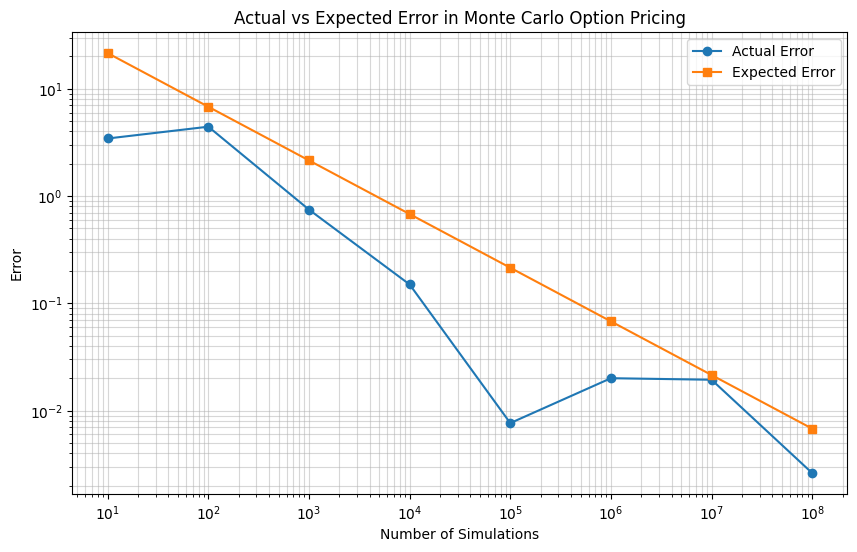

In [18]:
# Plot the absolute error and expected error vs number of simulations on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(simulation_numbers, errors, marker='o', label='Actual Error')
plt.loglog(simulation_numbers, expected_errors, marker='s', label='Expected Error')
plt.xlabel('Number of Simulations')
plt.ylabel('Error')
plt.title('Actual vs Expected Error in Monte Carlo Option Pricing')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()